In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt


# Adding Planned and Actual Schedules to Wind Data

In [2]:
planned = pd.read_hdf("planned_schedule.h5")
actual = pd.read_hdf("actual_schedule.h5")

In [3]:
stuff = pd.read_hdf("all_wind_data.h5")
stuff['good_time'] = pd.to_datetime(stuff.Time*24*60*60*1e9)
stuff.set_index('good_time', inplace=True)
stuff.sort_index(inplace=True)
del stuff['Time']
del stuff['stat']
resampled = pd.DataFrame()
resampled['v'] = stuff.v.resample('min').mean()
resampled['v_max'] = stuff.v_max.resample('min').mean()
stuff = resampled


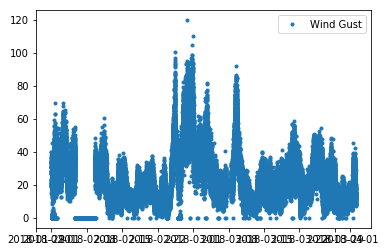

In [4]:
sel = slice('2018-02-01 00:00', '2018-04-02 02')
plt.plot((stuff[sel].v_max), '.',color = "C0",  label = 'Wind Gust')
plt.legend()
plt.show()

In [5]:
actual.loc[actual['fMeasurementTypeName'] == 'Startup', 'fStart'].iloc[1]

Timestamp('2013-04-10 20:27:00')

In [6]:
actual.set_index('fStart', inplace = True)
actual.sort_index(inplace=True)

In [7]:
planned.fMeasurementTypeName.unique()

array(['Startup', 'Data', 'Shutdown', 'Sleep'], dtype=object)

In [8]:
stuff.iloc[0]

v         7.9
v_max    12.1
Name: 2018-01-01 08:03:00, dtype: float32

In [9]:
actual.index

DatetimeIndex(['2013-04-09 20:30:00', '2013-04-09 20:40:00',
               '2013-04-09 22:14:00', '2013-04-09 22:14:00',
               '2013-04-09 22:55:00', '2013-04-09 22:55:00',
               '2013-04-10 01:57:00', '2013-04-10 05:54:00',
               '2013-04-10 20:27:00', '2013-04-10 20:37:00',
               ...
               '2019-05-16 03:57:00', '2019-05-16 05:12:00',
               '2019-05-16 05:18:00', '2019-05-16 05:27:00',
               '2019-05-16 20:27:00', '2019-05-16 20:37:00',
               '2019-05-16 20:57:00', '2019-05-16 23:34:00',
               '2019-05-17 03:52:00', '2019-05-17 05:11:00'],
              dtype='datetime64[ns]', name='fStart', length=13928, freq=None)

In [10]:
planned.set_index('fStart', inplace = True)
planned.sort_index( inplace = True)
planned = planned['2018-01-01 08:03:00':'2019-03-29 14:42:00']

In [11]:
actual = actual['2018-01-01 08:03:00':'2019-03-29 14:42:00']

In [12]:
actual.index

DatetimeIndex(['2018-01-03 19:07:00', '2018-01-03 19:22:00',
               '2018-01-03 20:02:00', '2018-01-04 00:36:00',
               '2018-01-04 05:11:00', '2018-01-04 05:40:00',
               '2018-01-04 19:08:00', '2018-01-04 19:23:00',
               '2018-01-04 20:03:00', '2018-01-04 22:50:00',
               ...
               '2019-03-27 02:55:00', '2019-03-27 06:07:00',
               '2019-03-27 20:03:00', '2019-03-27 20:18:00',
               '2019-03-28 02:50:00', '2019-03-28 06:05:00',
               '2019-03-28 20:57:00', '2019-03-28 22:20:00',
               '2019-03-29 02:46:00', '2019-03-29 06:04:00'],
              dtype='datetime64[ns]', name='fStart', length=2242, freq=None)

In [13]:
actual.index[actual['fMeasurementTypeName'] == 'Startup']

DatetimeIndex(['2018-01-03 19:07:00', '2018-01-04 19:08:00',
               '2018-01-05 19:09:00', '2018-01-06 22:19:00',
               '2018-01-07 22:20:00', '2018-01-08 22:20:00',
               '2018-01-09 22:15:00', '2018-01-10 22:12:00',
               '2018-01-11 19:13:00', '2018-01-11 22:04:00',
               ...
               '2019-03-16 19:56:00', '2019-03-17 20:02:00',
               '2019-03-18 20:04:00', '2019-03-22 20:00:00',
               '2019-03-23 20:00:00', '2019-03-24 20:01:00',
               '2019-03-25 20:02:00', '2019-03-26 20:02:00',
               '2019-03-27 20:03:00', '2019-03-28 20:57:00'],
              dtype='datetime64[ns]', name='fStart', length=385, freq=None)

In [14]:
actual_starts = actual.index[actual['fMeasurementTypeName'] == 'Startup'].tolist()
actual_starts

[Timestamp('2018-01-03 19:07:00'),
 Timestamp('2018-01-04 19:08:00'),
 Timestamp('2018-01-05 19:09:00'),
 Timestamp('2018-01-06 22:19:00'),
 Timestamp('2018-01-07 22:20:00'),
 Timestamp('2018-01-08 22:20:00'),
 Timestamp('2018-01-09 22:15:00'),
 Timestamp('2018-01-10 22:12:00'),
 Timestamp('2018-01-11 19:13:00'),
 Timestamp('2018-01-11 22:04:00'),
 Timestamp('2018-01-12 22:00:00'),
 Timestamp('2018-01-13 19:14:00'),
 Timestamp('2018-01-13 21:40:00'),
 Timestamp('2018-01-14 19:15:00'),
 Timestamp('2018-01-15 19:16:00'),
 Timestamp('2018-01-16 19:17:00'),
 Timestamp('2018-01-17 19:17:00'),
 Timestamp('2018-01-18 19:18:00'),
 Timestamp('2018-01-19 19:19:00'),
 Timestamp('2018-01-20 19:20:00'),
 Timestamp('2018-01-21 19:20:00'),
 Timestamp('2018-01-22 11:28:00'),
 Timestamp('2018-01-22 19:21:00'),
 Timestamp('2018-01-23 19:22:00'),
 Timestamp('2018-01-24 19:23:00'),
 Timestamp('2018-01-25 19:23:00'),
 Timestamp('2018-01-26 19:24:00'),
 Timestamp('2018-01-27 19:25:00'),
 Timestamp('2018-01-

In [15]:
actual_shutdowns = actual.index[actual['fMeasurementTypeName'] == 'Shutdown'].tolist()

In [16]:
actual_sch = pd.DataFrame(actual_starts, index = actual_starts)

Join the planned schedule to 'stuff'

In [17]:
stuff = stuff.join(planned, how='outer')

In [18]:
stuff.head()

,v,v_max,fSourceName,fUser,fMeasurementTypeName
2018-01-01 08:03:00,7.900000,12.100000,NaN,NaN,NaN
2018-01-01 08:04:00,6.633333,8.333333,NaN,NaN,NaN
2018-01-01 08:05:00,3.900000,7.900000,NaN,NaN,NaN
2018-01-01 08:06:00,5.933333,7.500000,NaN,NaN,NaN
2018-01-01 08:07:00,5.900000,7.300000,NaN,NaN,NaN


In [19]:
stuff[stuff['fMeasurementTypeName'] == 'Startup']


,v,v_max,fSourceName,fUser,fMeasurementTypeName
2018-01-03 19:07:00,30.500000,38.099998,None,auto,Startup
2018-01-04 19:08:00,13.966667,16.700001,None,auto,Startup
2018-01-05 19:09:00,18.900000,25.200001,None,auto,Startup
2018-01-06 19:09:00,28.400000,46.599998,None,auto,Startup
2018-01-07 19:10:00,20.600000,29.000000,None,auto,Startup
2018-01-08 19:11:00,7.950000,10.850000,None,auto,Startup
2018-01-09 19:11:00,3.900000,5.700000,None,auto,Startup
2018-01-10 19:12:00,11.266666,12.700000,None,auto,Startup
2018-01-11 19:13:00,12.500000,13.800000,None,auto,Startup
2018-01-12 19:14:00,6.933333,7.800000,None,auto,Startup


In [20]:
stuff = stuff['2018-01-03 19:07':]

In [21]:
stuff.head()

,v,v_max,fSourceName,fUser,fMeasurementTypeName
2018-01-03 19:07:00,30.500000,38.099998,None,auto,Startup
2018-01-03 19:08:00,24.000000,30.633333,NaN,NaN,NaN
2018-01-03 19:09:00,30.750000,35.900002,NaN,NaN,NaN
2018-01-03 19:10:00,28.599998,34.000000,NaN,NaN,NaN
2018-01-03 19:11:00,33.200001,36.599998,NaN,NaN,NaN


Figure out the planned observation times.

In [22]:
parked = []
column = stuff['fMeasurementTypeName']
for element in column:
    if element == 'Startup':
        parked.append(True)
    elif element == 'Shutdown':
        parked.append(False)
    else:
        parked.append(3)
for i,bool in enumerate(parked):
    if bool == 3:
        parked[i] = parked[i-1]
    else:
        pass
    
stuff['parked'] = parked
        

In [23]:
stuff

,v,v_max,fSourceName,fUser,fMeasurementTypeName,parked
2018-01-03 19:07:00,30.500000,38.099998,None,auto,Startup,True
2018-01-03 19:08:00,24.000000,30.633333,NaN,NaN,NaN,True
2018-01-03 19:09:00,30.750000,35.900002,NaN,NaN,NaN,True
2018-01-03 19:10:00,28.599998,34.000000,NaN,NaN,NaN,True
2018-01-03 19:11:00,33.200001,36.599998,NaN,NaN,NaN,True
2018-01-03 19:12:00,25.566666,34.466667,NaN,NaN,NaN,True
2018-01-03 19:13:00,21.600000,37.099998,NaN,NaN,NaN,True
2018-01-03 19:14:00,26.333334,33.766666,NaN,NaN,NaN,True
2018-01-03 19:15:00,28.500000,33.150002,NaN,NaN,NaN,True
2018-01-03 19:16:00,28.799999,38.000000,NaN,NaN,NaN,True


# Data Quality Check: Hadronness rate vs rain

In [24]:
df = pd.read_hdf("hadron_rate.h5")
df.head()

,fRunStart,fRunStop,fR750Cor,fZenithDistanceMean,fNumThreshold750,fEffectiveOn,fRunTypeKey,duration,on_time,hadron_rate
269067,2018-01-03 19:12:41,2018-01-03 19:13:21,NaN,NaN,NaN,0.9883,3,00:00:40,39.532,NaN
269068,2018-01-03 19:13:22,2018-01-03 19:14:02,NaN,NaN,NaN,0.9883,4,00:00:40,39.532,NaN
269069,2018-01-03 19:14:03,2018-01-03 19:14:43,NaN,NaN,NaN,0.9883,3,00:00:40,39.532,NaN
269070,2018-01-03 19:14:44,2018-01-03 19:15:24,NaN,NaN,NaN,0.9883,3,00:00:40,39.532,NaN
269071,2018-01-03 19:15:25,2018-01-03 19:16:05,NaN,NaN,NaN,0.9883,5,00:00:40,39.532,NaN


In [25]:
quality = df.query('on_time > 100 & fZenithDistanceMean < 40 & fRunTypeKey==1 & hadron_rate < 4.8')

In [26]:
quality[quality["fRunStart"] == "2018-05-03" ]

,fRunStart,fRunStop,fR750Cor,fZenithDistanceMean,fNumThreshold750,fEffectiveOn,fRunTypeKey,duration,on_time,hadron_rate


In [27]:
quality.fRunStart.values

array(['2018-01-03T19:44:28.000000000', '2018-01-03T19:49:33.000000000',
       '2018-01-03T19:54:37.000000000', ...,
       '2019-05-23T01:35:42.000000000', '2019-05-23T01:40:48.000000000',
       '2019-05-23T01:45:53.000000000'], dtype='datetime64[ns]')

In [28]:
del quality["fNumThreshold750"]

Text(0.5, 0, 'Hadron Rate')

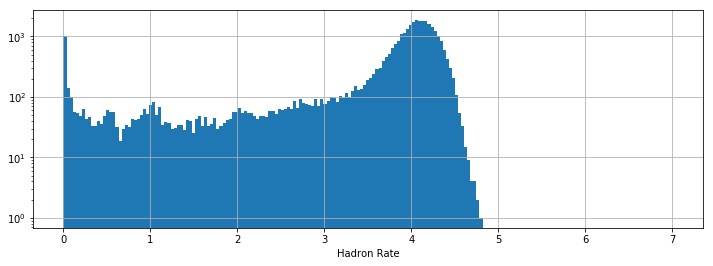

In [29]:
plt.figure(figsize=(12, 4))
quality.hadron_rate.hist(bins=np.linspace(0, 7, 200), log=True);
plt.xlabel("Hadron Rate")

# Bad Quality Runs are:

Where hadron_rate < 3.5 ??


In [30]:
df_rain = pd.read_hdf("updated_rain_data.h5")
df_rain['good_time'] = pd.to_datetime(df_rain.Time*24*60*60*1e9)
df_rain.set_index('good_time', inplace=True)
df_rain.sort_index(inplace=True)
del df_rain['QoS']
del df_rain['Time']

resampled = pd.DataFrame()
resampled['rain'] = df_rain.rain.resample('min').mean()
resampled['count'] = df_rain['count'].resample('min').mean()
df_rain = resampled

In [31]:
df_rain["2018-10-01":"2018-11-01"].mean()

rain      0.482760
count    30.258092
dtype: float64

In [32]:

series1 = quality["fRunStart"].astype(str)
runstart = series1.tolist()
#runstart
series2 = quality["fRunStop"].astype(str)
runstop = series2.tolist()
#runstop



In [33]:
df_rain['rain']['2018-06-03 19:49:33':'2018-07-03 19:49:33'].mean()

0.0001581940014148131

# Compare with Average 'raininess' 

In [34]:
rain_averages = []
for start, stop in zip(runstart, runstop):
    avg = df_rain.rain[start:stop].mean()
    rain_averages.append(avg)
rain_averages

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [35]:
quality["raininess"] = rain_averages


C:\Users\hazal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


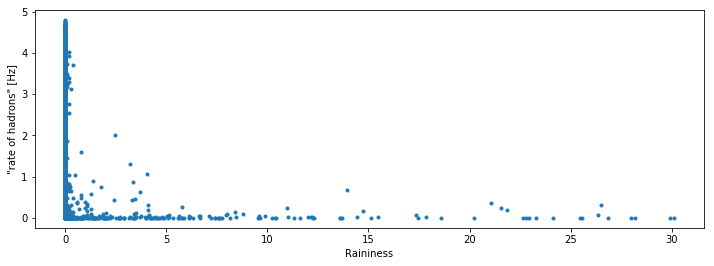

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(quality.raininess, quality.hadron_rate, '.');
plt.ylabel('"rate of hadrons" [Hz]')
plt.xlabel("Raininess")
plt.show()

In [37]:
quality1 = quality[quality.hadron_rate <3]

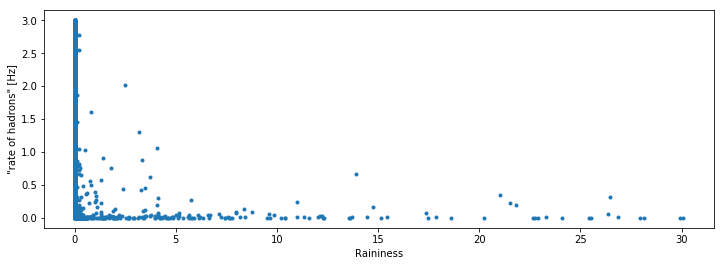

In [38]:
plt.figure(figsize=(12, 4))
plt.plot(quality1.raininess, quality1.hadron_rate, '.');
plt.ylabel('"rate of hadrons" [Hz]')
plt.xlabel("Raininess")
plt.show()

In [39]:
quality2 = quality.query('raininess > 0.1 & hadron_rate < 3')

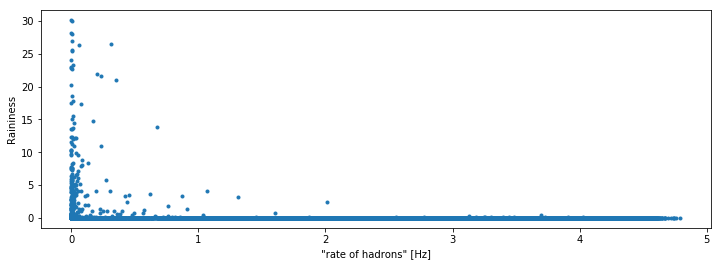

In [40]:
plt.figure(figsize=(12, 4))
plt.plot( quality.hadron_rate,quality.raininess, '.');
plt.xlabel('"rate of hadrons" [Hz]')
plt.ylabel("Raininess")
plt.show()

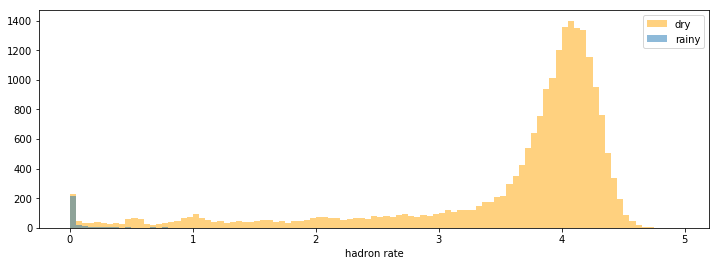

In [41]:
plt.figure(figsize=(12, 4))
plt.hist(quality[quality.raininess < 0.1]['hadron_rate'], alpha = 0.5, bins=np.arange(0, 5, 0.05), label='dry', color = "orange")
plt.hist(quality[quality.raininess > 0.1]['hadron_rate'], alpha = 0.5, bins=np.arange(0,5, 0.05), label='rainy')
plt.legend()
plt.xlabel('hadron rate')
plt.show()

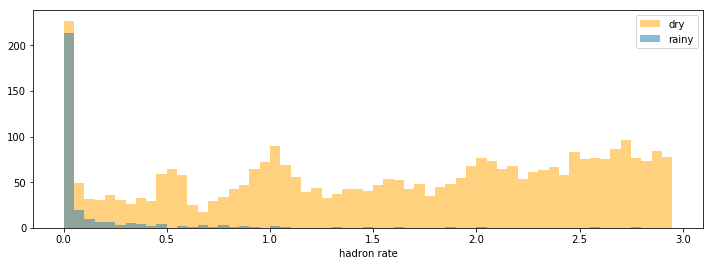

In [42]:
plt.figure(figsize=(12, 4))
plt.hist(quality1[quality1.raininess < 0.1]['hadron_rate'], alpha = 0.5, bins=np.arange(0, 3, 0.05), label='dry', color = "orange")
plt.hist(quality1[quality1.raininess > 0.1]['hadron_rate'], alpha = 0.5, bins=np.arange(0,3, 0.05), label='rainy')
plt.legend()
plt.xlabel('hadron rate')
plt.show()

# Raininess Sum vs Hadron rate


In [43]:

rain_sum = []
for start, stop in zip(runstart, runstop):
    sums = df_rain.rain[start:stop].sum()
    rain_sum.append(sums)
#rain_sum

quality['rain_sums'] = rain_sum

C:\Users\hazal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


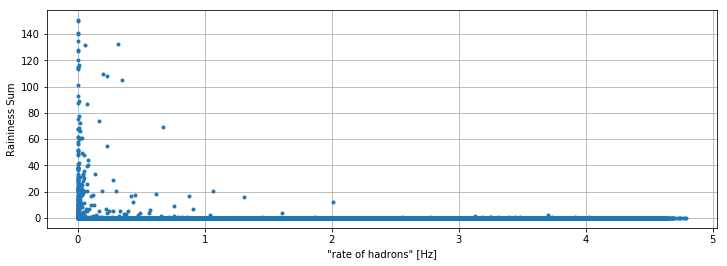

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(quality.hadron_rate,quality.rain_sums,  '.');
plt.xlabel('"rate of hadrons" [Hz]')
plt.ylabel("Raininess Sum")
plt.grid()
plt.show()

# ROLLING Raininess sum vs hadron rate 
Like how we do it in 'autopark.py'

In [45]:

df_rain['rolling_rain'] = (df_rain.rain > 0).rolling(30).sum()

rain_sums = []
for start, stop in zip(runstart, runstop):
    avg = df_rain.rolling_rain[start:stop].max()
    rain_sums.append(avg)
rain_sums

quality['rolling_rain_max'] = rain_sums

C:\Users\hazal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [46]:
quality1 = quality[quality.hadron_rate <3.5]

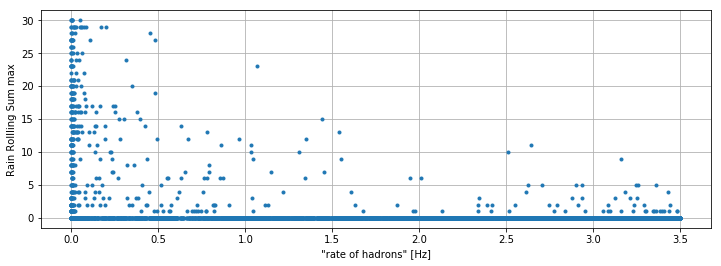

In [47]:
plt.figure(figsize=(12, 4))
plt.plot(quality1.hadron_rate,quality1.rolling_rain_max,  '.');
plt.xlabel('"rate of hadrons" [Hz]')
plt.ylabel("Rain Rollling Sum max")
plt.grid()
plt.show()

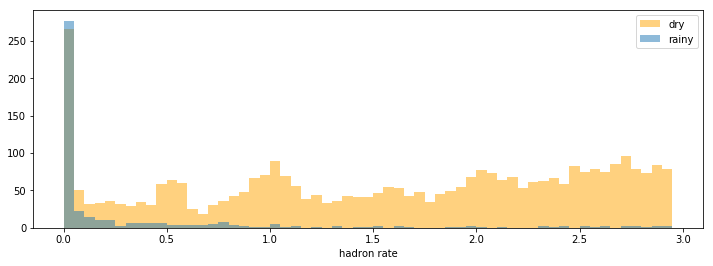

In [48]:
plt.figure(figsize=(12, 4))
plt.hist(quality1[quality1.rolling_rain_max < 10]['hadron_rate'], alpha = 0.5, bins=np.arange(0, 3, 0.05), label='dry', color = "orange")
plt.hist(quality1[quality1.rolling_rain_max > 0.1]['hadron_rate'], alpha = 0.5, bins=np.arange(0,3, 0.05), label='rainy')
plt.legend()
plt.xlabel('hadron rate')
plt.show()

# 'Parked' Comparison

In [49]:
import autopark2 as auto

In [50]:
typ, threshold,   name = auto.determine_data_type(df_rain)
if typ == "rain":
    col = df_rain.rain
    hyst_min = 10
    hyst_window = 10
else:
    col = df_rain.v_max
    hyst_min = 0
    hyst_window = 2
    #df_rain = auto.wind_methods(df_rain, threshold, 60)

df_rain = auto.make_decision(df_rain, col, threshold, 30, hyst_min, hyst_window)


In [51]:
df_rain[df_rain.park == True]

,rain,count,rolling_rain,rolling_sum,park
good_time,,,,,
2018-05-24 08:38:00,0.000000,30.0,NaN,NaN,True
2018-05-24 08:39:00,NaN,NaN,NaN,NaN,True
2018-05-24 08:40:00,0.000000,30.0,NaN,NaN,True
2018-05-24 08:41:00,0.000000,31.0,NaN,NaN,True
2018-05-24 08:42:00,NaN,NaN,NaN,NaN,True
2018-05-24 08:43:00,NaN,NaN,NaN,NaN,True
2018-05-24 08:44:00,NaN,NaN,NaN,NaN,True
2018-05-24 08:45:00,NaN,NaN,NaN,NaN,True
2018-05-24 08:46:00,0.000000,31.0,NaN,NaN,True


In [52]:
df_rain['2018-11-25 00'].park.count()

60

In [53]:


parked = []
for start, stop in zip(runstart, runstop):
    sumTrue = df_rain.park[start:stop].sum()
    sumAll = df_rain.park[start:stop].count()
    parked_ratio = sumTrue/sumAll
    if parked_ratio >= 0.2:
        parked.append(True)
    else:
        parked.append(False)
#parked



C:\Users\hazal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


In [54]:
quality['parked'] = parked

C:\Users\hazal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:

quality["fRunStart"]

269097   2018-01-03 19:44:28
269098   2018-01-03 19:49:33
269099   2018-01-03 19:54:37
269100   2018-01-03 19:59:42
269102   2018-01-03 20:05:42
269103   2018-01-03 20:10:47
269104   2018-01-03 20:15:51
269105   2018-01-03 20:20:55
269111   2018-01-03 20:28:31
269112   2018-01-03 20:33:36
269113   2018-01-03 20:38:40
269114   2018-01-03 20:43:45
269116   2018-01-03 20:49:18
269117   2018-01-03 20:54:22
269119   2018-01-03 21:00:45
269120   2018-01-03 21:04:31
269122   2018-01-03 21:10:06
269123   2018-01-03 21:15:11
269124   2018-01-03 21:20:15
269125   2018-01-03 21:25:20
269127   2018-01-03 21:30:57
269128   2018-01-03 21:36:01
269129   2018-01-03 21:41:05
269130   2018-01-03 21:46:10
269136   2018-01-03 21:53:48
269137   2018-01-03 21:58:53
269138   2018-01-03 22:03:57
269139   2018-01-03 22:09:17
269141   2018-01-03 22:14:53
269142   2018-01-03 22:19:58
                 ...        
343205   2019-05-22 22:55:00
343206   2019-05-22 23:00:05
343208   2019-05-22 23:05:37
343209   2019-

In [55]:
parked_runs = quality[quality.parked == True].parked.count()
total_runs = quality.parked.count()
print("Number of runs that were parked is ",parked_runs)
print("Total number of runs is ", total_runs)
print("Total saved is ",(parked_runs/total_runs)*100)

Number of runs that were parked is  118
Total number of runs is  33890
Total saved is  0.34818530539982295


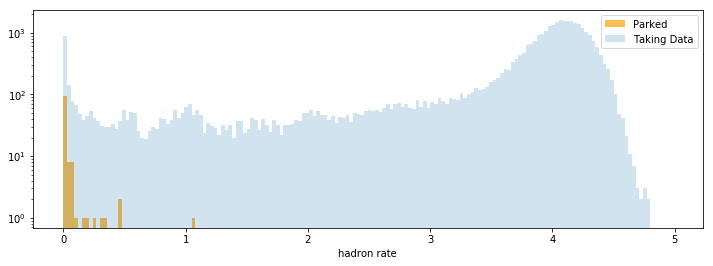

In [56]:
plt.figure(figsize=(12, 4))
plt.hist(quality[quality.parked == True]['hadron_rate'], alpha = 0.7, bins=np.arange(0, 5, 0.03), label='Parked', color = "orange", log = True)
plt.hist(quality[quality.parked == False]['hadron_rate'], alpha = 0.2, bins=np.arange(0,5, 0.03), label='Taking Data', log = True)
plt.legend()
plt.xlabel('hadron rate')
plt.show()

In [57]:
good_run = quality[(quality.hadron_rate >3.5) & (quality.parked == True)].fRunStart
#good_run_times = good_run[parked == True].fRunStart
lost_good_runs = good_run.count()
good_run_times = good_run.values
#    good_run_time = good_run.fRunStart.values
print("Number of GOOD RUNS that are lost with this algoritm is ", lost_good_runs)
print("Good runs lost are ", good_run)
print("Times of lost good runs are ", good_run_times)

Number of GOOD RUNS that are lost with this algoritm is  0
Good runs lost are  Series([], Name: fRunStart, dtype: datetime64[ns])
Times of lost good runs are  []
